## Hands-on exercise

This exercise is not graded and is intended to help you become familiar with the tools and libraries that you will be using throughout the rest of the course. If you are already experienced in using Google Colab, 🤗 Datasets, librosa and 🤗 Transformers, you may choose to skip this exercise.

- Create a Google Colab notebook.
- Use 🤗 Datasets to load the train split of the facebook/voxpopuli dataset in language of your choice in streaming mode.
- Get the third example from the train part of the dataset and explore it. Given the features that this example has, what kinds of audio tasks can you use this dataset for?
- Plot this example’s waveform and spectrogram.
- Go to 🤗 Hub, explore pretrained models and find one that can be used for automatic speech recognition for the language that you have picked earlier. Instantiate a corresponding pipeline with the model you found, and transcribe the example.
- Compare the transcription that you get from the pipeline to the transcription provided in the example.

If you struggle with this exercise, feel free to take a peek at an example solution. Discovered something interesting? Found a cool model? Got a beautiful spectrogram? Feel free to share your work and discoveries on Twitter!

In the next chapters you’ll learn more about various audio transformer architectures and will train your own model!

In [1]:
!pip install -q datasets[audio] librosa transformers matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.9/39.9 MB 13.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 474.3/474.3 kB 17.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 11.7 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires pyarrow<15.0.0a0,>=14.0.1, but you have pyarrow 17.0.0 which is incompatible.
ibis-framework 8.0.0 requires pyarrow<16,>=2, but you have pyarrow 17.0.0 which is incompatible.


In [3]:
from datasets import load_dataset
from datasets import Audio

voxpopuli_dutch = load_dataset("facebook/voxpopuli", name="nl", streaming=True)
voxpopuli_dutch

IterableDatasetDict({
    train: IterableDataset({
        features: ['audio_id', 'language', 'audio', 'raw_text', 'normalized_text', 'gender', 'speaker_id', 'is_gold_transcript', 'accent'],
        n_shards: 1
    })
    validation: IterableDataset({
        features: ['audio_id', 'language', 'audio', 'raw_text', 'normalized_text', 'gender', 'speaker_id', 'is_gold_transcript', 'accent'],
        n_shards: 1
    })
    test: IterableDataset({
        features: ['audio_id', 'language', 'audio', 'raw_text', 'normalized_text', 'gender', 'speaker_id', 'is_gold_transcript', 'accent'],
        n_shards: 1
    })
})

In [4]:
# first 3 of train

dataset_head = voxpopuli_dutch["train"].take(3)

In [5]:
# Get the third example and explore it
example = list(dataset_head)[-1]
example

{'audio_id': '20200723-0900-PLENARY-nl_20200723-10:59:16_9',
 'language': 9,
 'audio': {'path': 'train_part_0/20200723-0900-PLENARY-nl_20200723-10:59:16_9.wav',
  'array': array([-0.14505005, -0.15756226, -0.1546936 , ...,  0.04696655,
          0.12850952,  0.19076538]),
  'sampling_rate': 16000},
 'raw_text': 'En toen de Commissie en het Parlement zeiden dan gaan we samen de grenzen bewaken, werd er gezegd oké, wij stellen daar een budget voor ter beschikking.',
 'normalized_text': 'en toen de commissie en het parlement zeiden dan gaan we samen de grenzen bewaken werd er gezegd oké wij stellen daar een budget voor ter beschikking.',
 'gender': 'female',
 'speaker_id': '38398',
 'is_gold_transcript': True,
 'accent': 'None'}

In [6]:
from IPython.display import Audio

Audio(example["audio"]["array"], rate=16000)

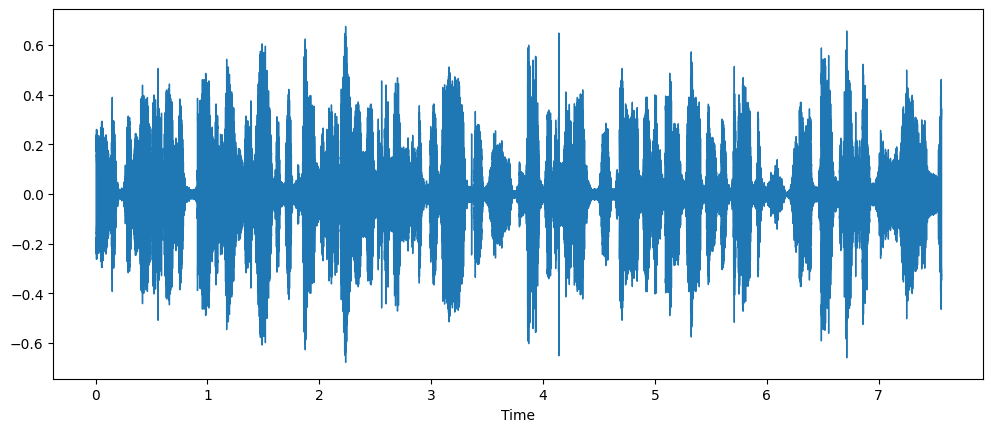

In [7]:
# waveform
import librosa
import matplotlib.pyplot as plt
import librosa.display

array = example["audio"]["array"]
sampling_rate = example["audio"]["sampling_rate"]

plt.figure().set_figwidth(12)
librosa.display.waveshow(array, sr=sampling_rate)

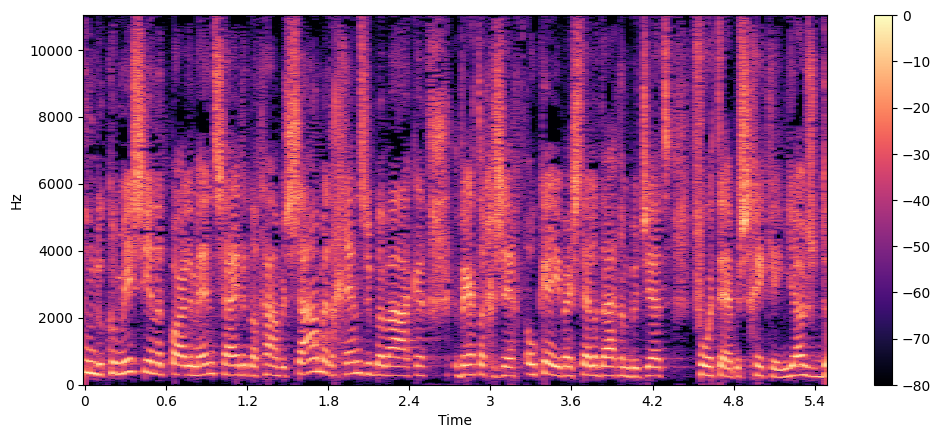

In [8]:
# spectogram
import numpy as np

D = librosa.stft(array)
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)

plt.figure().set_figwidth(12)
librosa.display.specshow(S_db, x_axis="time", y_axis="hz")
plt.colorbar()

In [12]:
from transformers import pipeline

asr = pipeline("automatic-speech-recognition", model="facebook/wav2vec2-large-xlsr-53-dutch")

config.json:   0%|          | 0.00/1.29k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.26G [00:00<?, ?B/s]

Some weights of the model checkpoint at facebook/wav2vec2-large-xlsr-53-dutch were not used when initializing Wav2Vec2ForCTC: ['wav2vec2.encoder.pos_conv_embed.conv.weight_g', 'wav2vec2.encoder.pos_conv_embed.conv.weight_v']
- This IS expected if you are initializing Wav2Vec2ForCTC from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing Wav2Vec2ForCTC from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of Wav2Vec2ForCTC were not initialized from the model checkpoint at facebook/wav2vec2-large-xlsr-53-dutch and are newly initialized: ['wav2vec2.encoder.pos_conv_embed.conv.parametrizations.weight.original0', 'wav2vec2.encoder.pos_conv_embed.conv.parametrizations.weight.original1']
You should probab

tokenizer_config.json:   0%|          | 0.00/376 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/470 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/85.0 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/158 [00:00<?, ?B/s]

In [17]:
# Comparison
output = asr(example["audio"]["array"])
print(output)
print(example["raw_text"])

{'text': 'decommissie en het parlement zeiden dan gaan we samen de grenzen bewaken werd er gezegd ok by stellen daag een buget voor ter beschikking juist'}
En toen de Commissie en het Parlement zeiden dan gaan we samen de grenzen bewaken, werd er gezegd oké, wij stellen daar een budget voor ter beschikking.


In [16]:
# compare audio
from IPython.display import Audio

Audio(output, rate=16000) # je hoort "juist" op het einde, dit is niet in originele